In [6]:
# Import necessary libraries
from preprocess import get_prepared_data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load preprocessed, prepared, relabelled data
X, y = get_prepared_data(oversample=True)

# Split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=69)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9898463227222832

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1822
           1       0.98      1.00      0.99      1822

    accuracy                           0.99      3644
   macro avg       0.99      0.99      0.99      3644
weighted avg       0.99      0.99      0.99      3644



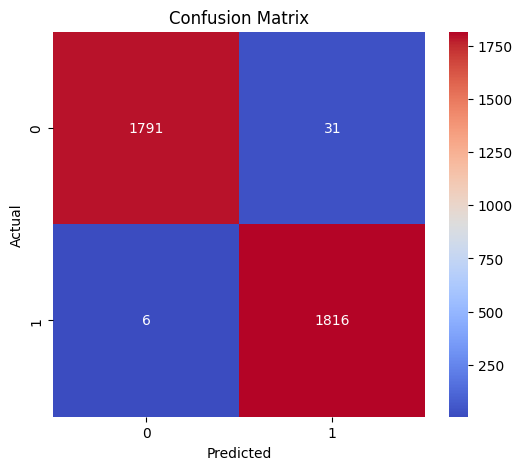

In [9]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True , cmap = "coolwarm",fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test,y_pred)

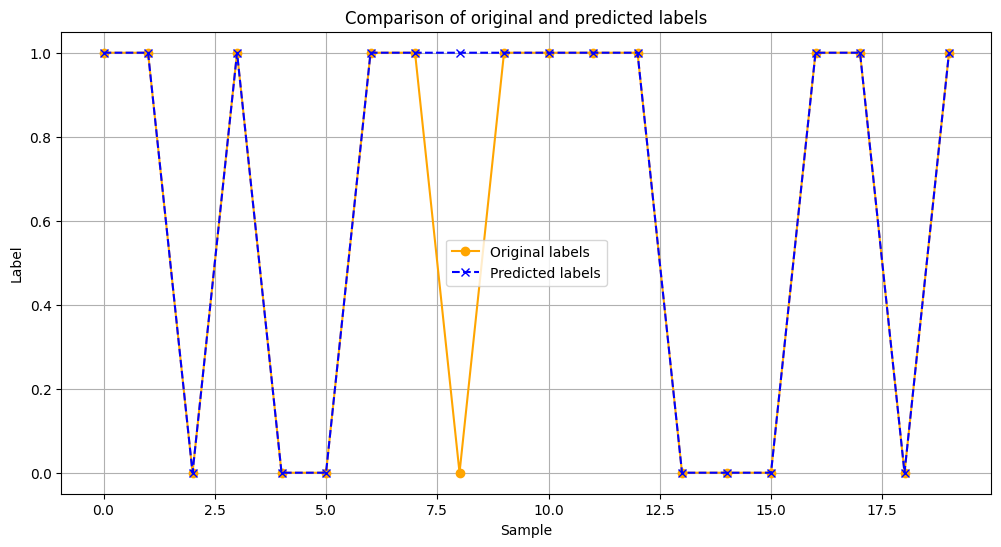

In [10]:
# Plot comparison of original and predicted labels
num_samples_to_plot = 20
indices = np.arange(num_samples_to_plot)
original_labels = y_test[:num_samples_to_plot]
predicted_labels = y_pred[:num_samples_to_plot]

plt.figure(figsize=(12, 6))
plt.plot(indices, original_labels, marker='o', linestyle='-', color='orange', label='Original labels')
plt.plot(indices, predicted_labels, marker='x', linestyle='--', color='blue', label='Predicted labels')
plt.xlabel("Sample")
plt.ylabel("Label")
plt.title("Comparison of original and predicted labels")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Save the trained model and scaler
def save_model():
    with open('../trained/svm_model.pkl', 'wb') as file:
        pickle.dump(svm_model, file)

    # with open("../trained/scaler.pkl", "wb") as file:
    #     pickle.dump(scaler, file)

save_model()